In [34]:
from __future__ import division
from itertools import product, ifilter, izip, imap, chain, starmap, combinations
from functools import partial
from operator import getitem
from random import sample, seed
from collections import Counter

import cv2
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import clear_output
from collections import Counter
from scipy.cluster.hierarchy import dendrogram, linkage

# helper functions

def indices( image ):
    return product(*map( range, image.shape ))

def load_image( name ):
    image = cv2.imread( 'images/%s' % name, cv2.IMREAD_COLOR )
    return cv2.cvtColor( image, cv2.COLOR_BGR2RGB )

def show_image( image, ax = None ):
    ''' Given a matrix representing an image, (and optionally an axes to draw on), 
        matplotlib is used to present the image inline in the notebook.
    '''
    if ax == None:
        fig, ax = plt.subplots()
        ax.imshow( image, cmap = 'Greys_r' )
        ax.axis( 'off' )
        plt.show()
    else:
        ax.imshow( image, cmap = 'Greys_r' )
        ax.axis( 'off' )
        
def ideal_grid_size( n ):
    bound = 1 + int( np.ceil( np.sqrt( n ) ) )
    size = ( 1, n )
    for i in range( 1, bound ):
        if not n % i:
            j = n // i
            size = ( i, j )
    return size
    
def show_images( images, titles = [], orientation = 'horizontal', 
                figsize=(32, 32), structure = [] ):
    
    if not structure:
        l = len( images )
        if orientation == 'vertical':
            ncols, nrows = ideal_grid_size( l )
        else:
            nrows, ncols = ideal_grid_size( l )
            
        structure = [ ncols ] * nrows    
        
    for n in structure:
        fig = plt.figure( figsize = figsize )
        for plotnum in range( 1, n + 1 ):
            ax = fig.add_subplot( 1, n, plotnum )
            if titles:
                ax.set_title( titles.pop(0) )
            plotnum += 1
            ax.axis( 'off' )
            ax.imshow( images.pop(0), cmap='Greys_r' )
        plt.show()

# Fourier Analysis

The core principle of Fourier series is that the set of real periodic functions can be constructed as a Hilbert space of
infinite dimensions with sine and cosine functions of different frequencies forming the basis vectors. More specifically,
considering any real valued function $f : \mathbb{R} \rightarrow \mathbb{R}$ where for some $T$ and all $x$, 
$f(x) = f(x+T)$, Fourier analysis says that for $f$, there exists sequences of coefficients
over the reals, $\langle a_n \rangle$ and $\langle b_n \rangle$ known as the Fourier coefficients such that,

$$
    f(x) = \sum_{n=0}^{\infty}{a_n \cos\Big(\frac{2\pi n x}{T}\Big) + b_n \sin\Big(\frac{2\pi n x}{T}\Big)}
$$

As sin(0) = 0 and cos(0) = 1, this is often written as,

$$
    f(x) = a_0 + \sum_{n=1}^{\infty}{a_n \cos\Big(\frac{2\pi n x}{T}\Big) + b_n \sin\Big(\frac{2\pi n x}{T}\Big)}
$$

This allows any arbitrary periodic function to be broken into a set of simple terms that can be solved individually, 
and then combined to obtain the solution to the original problem or an approximation to it.

As mentioned previously, the functions are elements of a vector space with different frequencies of cosine and
sine functions forming the basis vectors. This fact allows us to understand how we can compute the Fourier 
coefficients. Consider a more general $n$ dimensional vector space $V$ with orthonormal basis vectors 
$B = \{ \mathbf{e}_i : 0 \leq i < n\}$, and orthogonality defined through
the inner product (dot product) such that two vectors $\mathbf{v, w}$ are orthogonal if and only if 
$\mathbf{v} \cdot \mathbf{w} = 0$. Hence for any $\mathbf{v} \in V$ we can write,

$$
    \mathbf{v} = \sum_{i = 0}^{n}{c_i \mathbf{e}_i}
$$

for coefficients $\langle c_i \rangle$. To compute an individual coefficient $c_j$, we use the fact that all the basis 
vectors are orthonormal to say for $i \neq j, \mathbf{e}_i \cdot \mathbf{e}_j = 0$ and 
$\mathbf{e}_j \cdot \mathbf{e}_j = 1$, leading to,

$$
    c_j = \mathbf{v} \cdot \mathbf{e}_j 
$$

Going back to our more specific case for Fourier analysis, for functions $f, g$ in the vector space of periodic
functions we define the inner product to be

$$
    f \cdot g =\frac{1}{T} \int_{0}^{2 T}{f(x) g(x) dx}
$$

We choose the limits as such and divide by $T$ to get the desired properties from the inner product, these
are highlighted  by considering general elements of the basis set $\cos nx, \cos mx, \sin nx, \sin mx$ such that
$m \neq n$,

\begin{align*}
    \cos nx \cdot \cos mx &= \frac{1}{\pi}  \int_0^{2\pi}{ \cos nx \cos mx dx} = 0 \\
    \cos nx \cdot \sin mx &= \frac{1}{\pi}  \int_0^{2\pi}{ \cos nx \sin mx dx} = 0 \\
    \sin nx \cdot \sin mx &= \frac{1}{\pi}  \int_0^{2\pi}{ \sin nx \sin mx dx} = 0 \\
    \cos nx \cdot \cos nx &= \frac{1}{\pi}  \int_0^{2\pi}{ \cos nx \cos nx dx} = 1 \\
    \sin nx \cdot \sin nx &= \frac{1}{\pi}  \int_0^{2\pi}{ \sin nx \sin nx dx} = 1
\end{align*}

So applying these identities to the case of $f(x)$, with the same reasoning that got us the coefficients in the 
general vector space case we can find the Fourier coefficients by taking the inner product with the basis functions 

\begin{align*}
    a_n &= \int_{-\frac{T}{2}}^{\frac{T}{2}}{ f(x) \cos\Big( \frac{2\pi n x}{T}\Big) dx } \\
    b_n &= \int_{-\frac{T}{2}}^{\frac{T}{2}}{ f(x) \sin\Big( \frac{2\pi n x}{T}\Big) dx }
\end{align*}

### Fourier Transforms

The motivation behind Fourier transforms is to produce a function $F$ that describes the frequencies in some
other function $f$. We call the domain of $f$ the time domain and the domain of $F$ the frequency domain, this
is simply because this is usually applied to problems involving signals.
The idea is that if we chose some frequency $u$, the value $F(u)$ is how

Formally defined, the Fourier transform $F$ of a univariate continuous function $f$ is defined as,

$$
    F(u) = \int_{-\infty}^{\infty}{f(x) e^{-2\pi uxi} dx}
$$

where $i$ is the imaginary number $i^2 = -1$. This is discretized by assuming $0 \leq x \in \mathbb{N} < n$
and replacing the integral with a sum,

$$
    F(u) = \frac{1}{n} \sum_{x=0}^{n-1}{f(x) e^{-(2\pi ux/n)i} }
$$

The concept of the frequency domain follows from Euler's Formula for $e^{-i\theta}$, whereby each term
of the Fourier transform is composed of the sum of *all* values of the function $f$ multiplied be
the sines and cosines of various frequencies. In this context we say that we've transformed from a time
domain to a frequency domain representation.

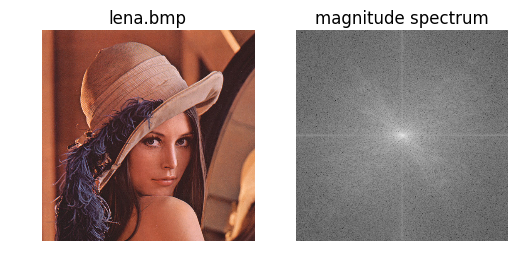

In [37]:
def mag_spec( image ):
    if len( image.shape ) == 3:
        image = cv2.cvtColor( image, cv2.COLOR_RGB2GRAY )
    f = np.array( image, dtype=float )
    z = np.fft.fft2(f)                # do fourier transform
    q = np.fft.fftshift(z)            # puts u=0,v=0 in the centre
    M = np.absolute(q)                # magnitude spectrum
    return np.log(M + 1)

lena = load_image( 'lena.bmp' )
fig = plt.figure()
ax = fig.add_subplot( 121 )
ax.set_title( 'lena.bmp' )
show_image( lena, ax )
ax = fig.add_subplot( 122 )
ax.set_title( 'magnitude spectrum' )
show_image( mag_spec( lena ), ax )
plt.show()

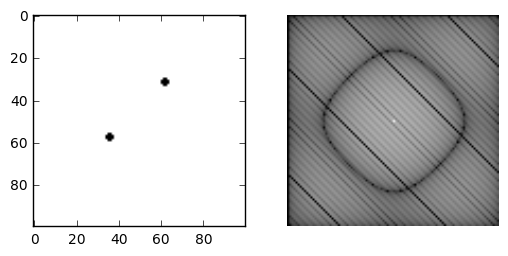

In [35]:
image = load_image( 'dots1.png' )
fig = plt.figure()
ax = fig.add_subplot( 121 )
show_image( image, ax )
ax.axis( 'on' )
ax = fig.add_subplot( 122 )
show_image( mag_spec( image ), ax )
plt.show()

### Frequency Domain Analysis

A simple example is to consider speech recognition between two utterances $x(t)$ and $y(t)$. A naive approach
would be to apply some least-squares like model with $E=\sum_t (x(t) - y(t))^2$, where $E$ measures the distance
a distance between the utterances. However the problems with these approaches is they don't account for the
kinds of transformations we want speech recognition to pick up on, such as $x(t) = y(x+c_1)$ or $x(t) = c_2y(t)$ for
arbitrary constants $c_1, c_2$.

To solve this we take the Fourier transforms for both utterances to get $X(u)$ and $Y(u)$, and then we consider
the Euclidean distance between their magnitude spectrums $|X(u)|$ and $|Y(u)|$.


### Spatial Frequency

Fourier transforms in higher dimensions follow quite naturally from the one dimensional case,
$$
    F(u, v) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty}{f(x, y)\ e^{-2\pi i(ux + vy)} dxdy}
$$
For example images are functions of two variables, and hence can be defined in terms of a *spatial frequency*.
The Fourier transform characterises the rate of change of intensity along each dimension for an image. Most of the
concepts from one dimension follow quite straight forwardly into two dimensions, such as transformations between
time and frequency domains.

## Convolutions

We can filter symbols and signals in the spatial/time domain to introduce some form of enhancement to the
data and prepare it for further processing or feature selection. Many spatial filters are implemented with
covolution masks. If $f$ is the signal, $h$ is the covolution filter and the discrete form of the convolution is
defined,

$$
    g(x) = \sum_{i = -n}^{n}{f(x-i)h(i)}
$$

It is extended into multiple dimensions in the obvious way, and is written in shorthand as $g = f*h$.

### Convolution Theorem

Convolution in the spatial domain is equivalent to multiplication in the frequency domain (and vice versa).

\begin{align*}
    g = f*h &\implies G = FH \\
    g = fh &\implies G = F*H	
\end{align*}

### Example: Edge Features

In an image, edges occur when there is discontinuity or large rates of change in the intensity function. Threshold
values can then be used to detect more or less rapid changes, and hence sharper or softer edges. If we
use the have the intensity function $f(x, y)$, we can work to find values of $x$ and $y$ that satisfy
$ || \nabla f || < d$ for some threshold $d$. We can also extract infomation about the gradient vectors to build a
more sophisticated feature set. This kind of information would be useful for machine learning algorithms associated
with computer vision.

In [41]:
def to_255( img ):
    out = img - np.min( img )
    return out * 255 / np.max(out)

def sobel( img ):
    if len( img.shape ) == 3:
        img = cv2.cvtColor( img, cv2.COLOR_BGR2GRAY )
    gray = np.float32( img )
    dfdx = cv2.filter2D( gray, -1, np.matrix( '-1 0 1;-1 0 1;-1 0 1' ) )
    dfdy = cv2.filter2D( gray, -1, np.matrix( '-1 -1 -1;0 0 0;1 1 1' ) )
    mag = np.hypot( dfdx, dfdy )
    psi = np.arctan2( dfdy, dfdx )
    return dfdx, dfdy, mag, psi

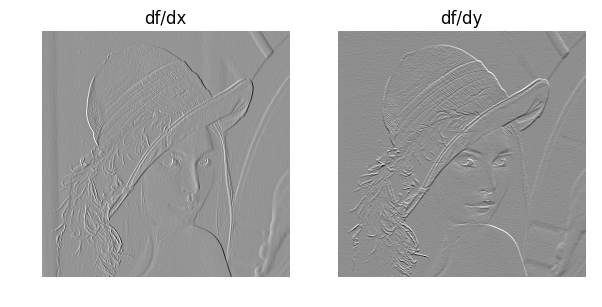

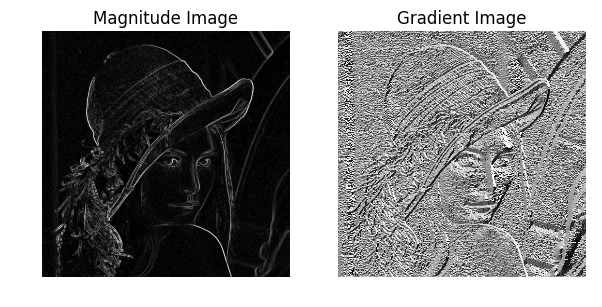

In [44]:
show_images( map( to_255, list(sobel(lena)) ), figsize = (7, 7), \
             titles = [ 'df/dx', 'df/dy', 'Magnitude Image', 'Gradient Image' ] )

# Hough Transforms

Given an image $\underset{m \times n}{I}$ and a shape described by $p$ parameters, the Hough transform $H$ is a $p$-dimensional space that maps every possible instance of the given shape to a value indicating its presence in $I$. A caveat here is that within an image there are exponentially many incarnations of a shape that could be present, to counter this the transform is provided with a resolution to search the parameter space with. That is, for each parameter an interval and step value is provide to discretization and control the run-time of the algorithm. This resolution then describes the size of the outputted transform, and it provides the mapping between elements in the transform and the parameters of the shape they represent. Another factor in searching for possible shape incarnations is the nature of the shape itself, more specifically the solvability of the system of equations used to describe the shape.

The process of detecting shapes in images using Hough transforms is to find shapes that have values in the transform greater than some threshold. Rarely is one actually looking for perfect incarnations of a given shape in an image, however the Hough transform still provides indication of where shape-like features exist. In the situation where a perfect shape exists there would appear a sharp maxima at the exact point in the transform corresponding to the associated shape, as the shape becomes more imperfect this maxima becomes less and less sharp. Hence in order to detect non-perfect shapes the program instead needs too look for regions of high intensity in the transform and pick a single shape within the blob to represent the feature.

### Hough Line Transform

Lines are characteristic of two parameters; the $r$ and $\varphi$ values of the equation $r = x\sin \varphi + y\cos \varphi$. This means for a given image $\underset{m \times n}{I}$ the Hough transform is two-dimensional space for which the dimensions are dependent on the resolution of a given parameter search space. 

In [5]:
def draw_line( image, (r, phi) ):
    ''' Set all the points in an image along a given linear equation to a value of 1. '''
    newImage = np.zeros( image.shape )
    transpose = phi < np.arctan2(*image.shape)
    if transpose:
        newImage = newImage.transpose()
        
    for x, y in indices( newImage ):
        if transpose:
            newImage[x, y] = image[y, x]
        else:
            newImage[x, y] = image[x, y]
        
    for x in range( newImage.shape[0] ):
        y = int((r - x * np.sin(phi)) / np.cos(phi)) \
            if transpose else \
            int((r - x * np.cos(phi)) / np.sin(phi))
        if 0 <= y < newImage.shape[1]:
            newImage[x, y] = 1
            
    return newImage.transpose() if transpose else newImage

def round_nearest( x, n ):
    ''' rounds x to the nearest multiple of n that is less than x '''
    return int(x / n) * n

def hough_line_transform( image, resolution ):
    '''
        Given an image with one colour channel and a set of min, max, skip
        values to use as a resolution of the Hough transform, this function
        returns a matrix with votes corresponding to lines and a function
        mapping entries in the Hough transform to line parameters.
    '''
    
    r_min, r_max, p_min, p_max, r_skip, p_skip = resolution
    
    hough = np.zeros((1 + int( (r_max - r_min) / r_skip ), \
                      1 + int( (p_max - p_min) / p_skip )))
    
    greq_zero = partial( getitem, image )
    for x, y in filter( greq_zero, indices( image ) ):
        for hy, p in enumerate(np.arange( p_min, p_max, p_skip )):
            r = x * np.cos(p) + y * np.sin(p)
            hx = round_nearest( r, r_skip ) - r_min
            hough[ hx, hy ] += 1
        
    return hough, lambda x, y : ((r_min + x * r_skip, 
                                  p_min + y * p_skip), hough[ x, y ])

def accum_best( dist_fn, min_dist, thresh, acc, x ):
    '''
        A function to be partially applied and used in a fold operation
        to extract parameters from a parameter to vote mapping.
    '''
    p, v = x
    if v < thresh: return acc
    if acc == []: return [x]
    pl, vl = acc[-1]
    if dist_fn( pl, p ) > min_dist: return acc + [x]
    if vl < v: return acc[:-1] + [x]
    return acc

def hough_extract( hough_space, extract_fn, param_dist_fn,
                   thresh, min_dist ):
    '''
        Extract shape parameters from a Hough transform
    '''
    items = list(starmap( extract_fn, indices( hough_space ) ))
    items.sort( key = lambda x : param_dist_fn( (0, 0), x[0] ) )
    accum = partial( accum_best, param_dist_fn, min_dist, thresh )
    params_votes = reduce( accum, items, [] )
    return [ p for p, v in params_votes ]

The following generates an image with `num_lines` random lines drawn across it and computes the Hough space with a given resolution for the parameter search.

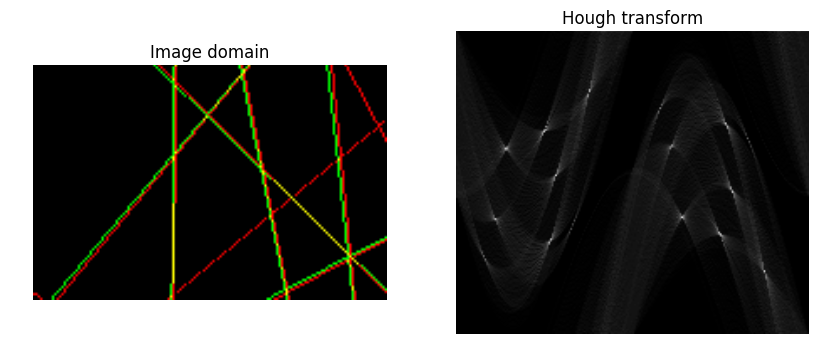

In [46]:
def demo_hough_lines( num_lines ):
    shape = 100, 150
    image = np.zeros(shape)
    
    seed(0)
    lines = zip(sample(range(max( *image.shape )), num_lines),
                sample(np.linspace(-np.pi, np.pi, 5*num_lines), num_lines))

    image = reduce( draw_line, lines, image )

    r_min, r_max = 0, int(np.hypot( *image.shape ))
    p_min, p_max = 0, np.pi * 2
    r_skip, p_skip = 1, 0.03
    resolution = ( r_min, r_max, p_min, p_max, r_skip, p_skip )
    image_lines, param_map = hough_line_transform( image, resolution )

    def euclid( (x1, y1), (x2, y2) ):
        return ( (x1 - x2)**2 + (y1 - y2)**2 )**0.5

    lines_h = hough_extract( image_lines, param_map, euclid, 20, 10 )

    image_h = reduce( draw_line, lines_h, np.zeros(shape) )

    image_c = np.zeros( image.shape + (3,) )
    for x, y in indices( image ):
        image_c[ x, y, 0 ] = image[x, y]
        image_c[ x, y, 1 ] = image_h[x, y]

    fig = plt.figure( figsize = (10, 10) )
    ax = fig.add_subplot( 121 )
    ax.set_title( 'Image domain' )
    show_image( image_c, ax )
    ax = fig.add_subplot( 122 )
    ax.set_title( 'Hough transform' )
    show_image( image_lines, ax )
    plt.show()
    
for i in range( 1, 14 ):
    demo_hough_lines( i )
    clear_output( wait = True )

In the left image above, the red lines represent the original lines generated at random and the green lines represent the lines derived from the Hough transform. The right image shows the Hough transform as an image, areas of brightness correspond to more pixels voting that the associated lines appear in the input image. 

Run the cell above to see how the algorithm reacts to different arrangements. Tuning the `min_dist` and `thresh` values of the extracting parameters function also changes how many lines are detected.

### Hough Circle Transform

Circles are shapes described by the two parametric equations $x = x_0 + r \cos \varphi$ and $y = y_0 + r \sin \varphi$, hence a system of six variables, hence for the $x$ and $y$ values of white pixels in the input image the parameter search space is two dimensional - for every $r, \varphi$ pair possible there exists a single $x_0, y_0$ pair that satisfies the parametric equations. This makes the operation of updating the Hough transform for each $x, y$ run in quadratic time, this can be reduce to linear time by encoding an additional piece of information into the algorithm. By using the gradient image $\nabla I$ we can reduce the number of viable $x_0, y_0$ positions as,

\begin{align*}
    x_0 &= x \pm \cos \nabla I_{x,y} \\
    y_0 &= y \pm \sin \nabla I_{x,y} \\
\end{align*}